In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets  # Make sure this line is included
from IPython.display import display

sns.set(style="whitegrid")
%matplotlib inline



In [ ]:
# Load the dataset
churn_df = pd.read_csv('/content/telecom_customer_churn.csv')
zipcode_df = pd.read_csv('/content/telecom_zipcode_population.csv')



In [ ]:
print("Customer Churn Data:")
print(churn_df.info())
print(churn_df.head())

print("\nZip Code Population Data:")
print(zipcode_df.info())
print(zipcode_df.head())

Customer Churn Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              

In [ ]:
zipcode_df.describe()


,Zip Code,Population
count,1671.000000,1671.000000
mean,93678.992220,20276.384201
std,1817.763591,20689.117300
min,90001.000000,11.000000
25%,92269.000000,1789.000000
50%,93664.000000,14239.000000
75%,95408.000000,32942.500000
max,96161.000000,105285.000000


In [ ]:
churn_df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
print(churn_df.shape )
print(churn_df.size)
print(churn_df.keys())

(7043, 38)
267634
Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [ ]:
print(zipcode_df.shape )
print(zipcode_df.size)
print(zipcode_df.keys())

(1671, 2)
3342
Index(['Zip Code', 'Population'], dtype='object')


## **Data Cleaning**

In [ ]:
# Check for duplicates
print("Duplicates in Customer Churn Data:", churn_df.duplicated().sum())
print("Duplicates in Zip Code Data:", zipcode_df.duplicated().sum())

# Drop duplicates if any
churn_df.drop_duplicates(inplace=True)
zipcode_df.drop_duplicates(inplace=True)


Duplicates in Customer Churn Data: 0
Duplicates in Zip Code Data: 0


## **Handle Missing Values**

In [ ]:
# Check for missing values
print("Missing Values in Customer Churn Data:\n", churn_df.isnull().sum())
print("Missing Values in Zip Code Data:\n", zipcode_df.isnull().sum())

# Impute missing values with mean for numerical columns and mode for categorical columns

# Impute missing values for numerical columns with the mean
for column in churn_df.select_dtypes(include=['float64', 'int64']).columns:
    churn_df[column].fillna(churn_df[column].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
for column in churn_df.select_dtypes(include='object').columns:
    churn_df[column].fillna(churn_df[column].mode()[0], inplace=True)



Missing Values in Customer Churn Data:
 Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                        

<ipython-input-17-2b9b2f4c3bdd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df[column].fillna(churn_df[column].mean(), inplace=True)
<ipython-input-17-2b9b2f4c3bdd>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

## ** Data Transformation**

## **Join Tables**

In [ ]:
# Merge the dataframes on the ZIP code column
print("Zip Code Population Data Columns:", zipcode_df.columns)

merged_df = pd.merge(churn_df, zipcode_df, how='left', on='Zip Code')

Zip Code Population Data Columns: Index(['Zip Code', 'Population'], dtype='object')


## **Create New Features (e.g., Tenure Grouping)**

In [ ]:
# Create a tenure group column based on "Tenure in Months"
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 36:
        return '2-3 Years'
    else:
        return '3+ Years'

# Apply the tenure_group function to the "Tenure in Months" column
merged_df['TenureGroup'] = merged_df['Tenure in Months'].apply(tenure_group)



In [ ]:
merged_df.head()
merged_df.info()
merged_df.describe()
merged_df.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

(7043, 40)

### **Statistical Analysis**

### **Summary Statistics**

In [ ]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(merged_df.describe())

# Value counts for categorical variables
for column in merged_df.select_dtypes(include='object').columns:
    print(f"\nValue Counts for {column}:\n", merged_df[column].value_counts())


Summary Statistics for Numerical Columns:
               Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.7

## **download Merged csv**

In [ ]:
merged_df.to_csv('merged_df.csv', index=False)

print("Merged DataFrame has been saved to 'merged_df.csv'.")

Merged DataFrame has been saved to 'merged_df.csv'.


## **Correlation Analysis**

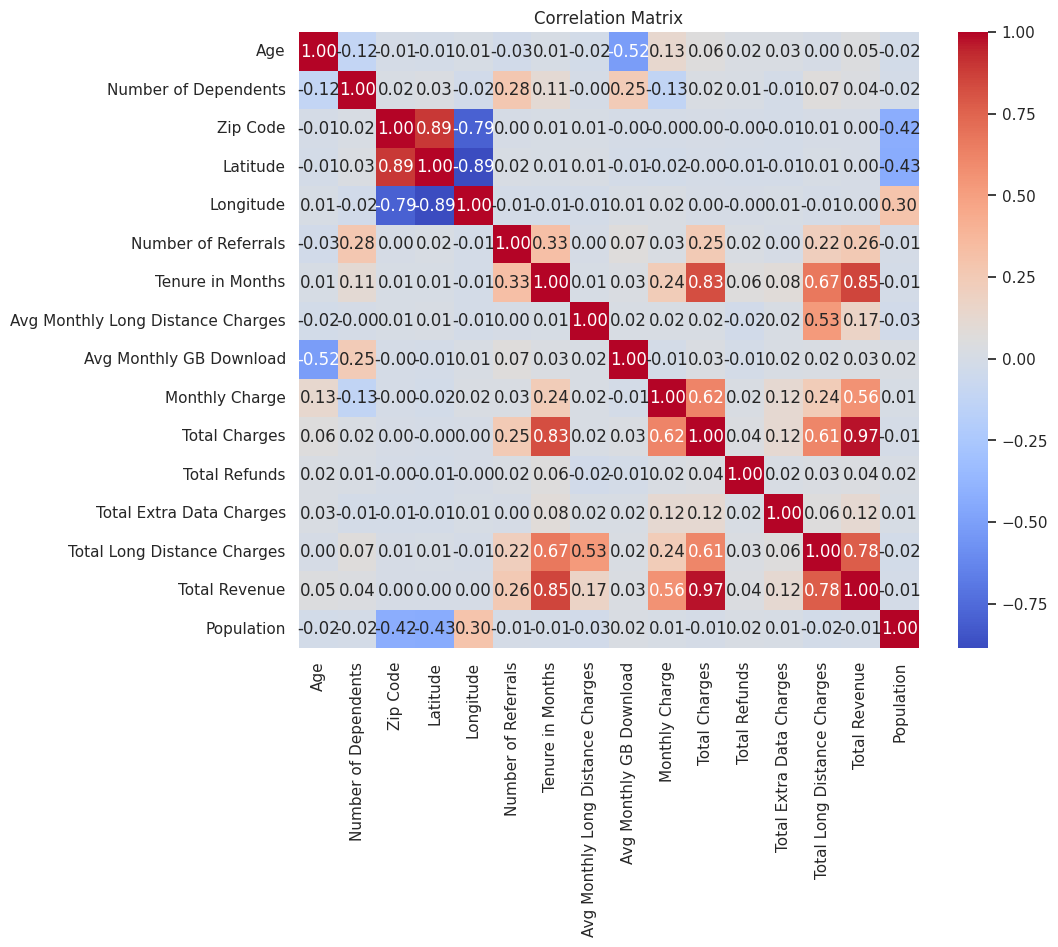

In [ ]:
# Filter to only include numeric columns for correlation calculation
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## **Data Visualization**

### **Churn Rate by Tenure Group**

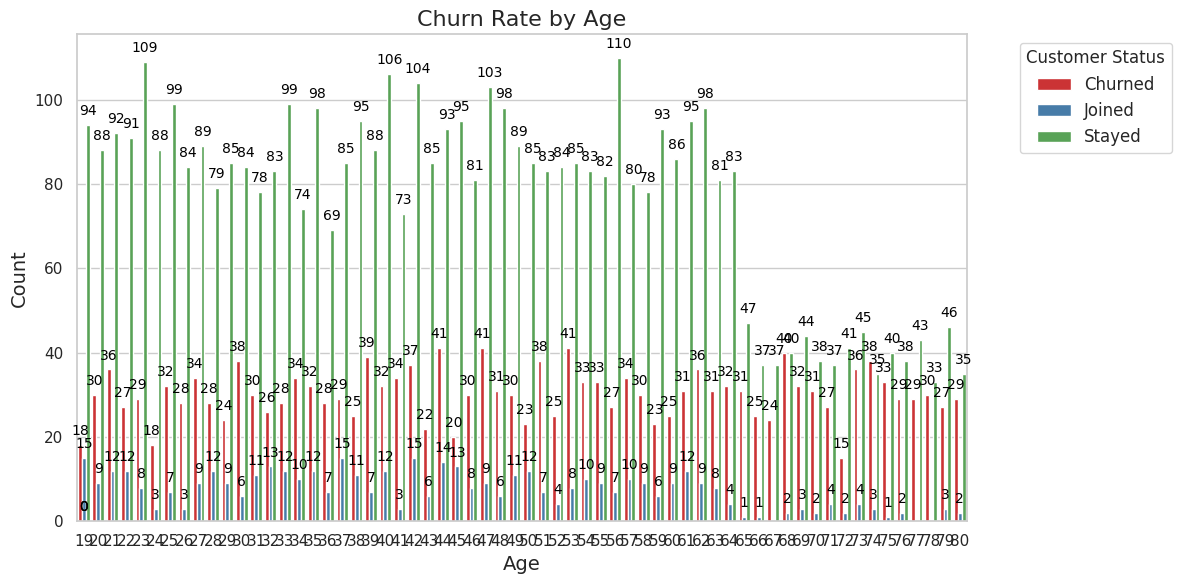

In [ ]:
# Replace 'Age' with your chosen feature to analyze
chosen_feature = 'Age'  # Example: Change this to any other feature you want to analyze

# Create a sorted DataFrame for better visualization
sorted_counts = merged_df.groupby([chosen_feature, 'Customer Status']).size().reset_index(name='Count')
sorted_counts = sorted_counts.sort_values(by=chosen_feature)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_counts, x=chosen_feature, y='Count', hue='Customer Status', palette='Set1')

# Title and labels
plt.title(f"Churn Rate by {chosen_feature}", fontsize=16)
plt.xlabel(chosen_feature, fontsize=14)
plt.ylabel("Count", fontsize=14)

# Adding data labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                xytext=(0, 5),
                textcoords='offset points')

# Adjust legend position
plt.legend(title='Customer Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Adjust layout for better fit
plt.show()




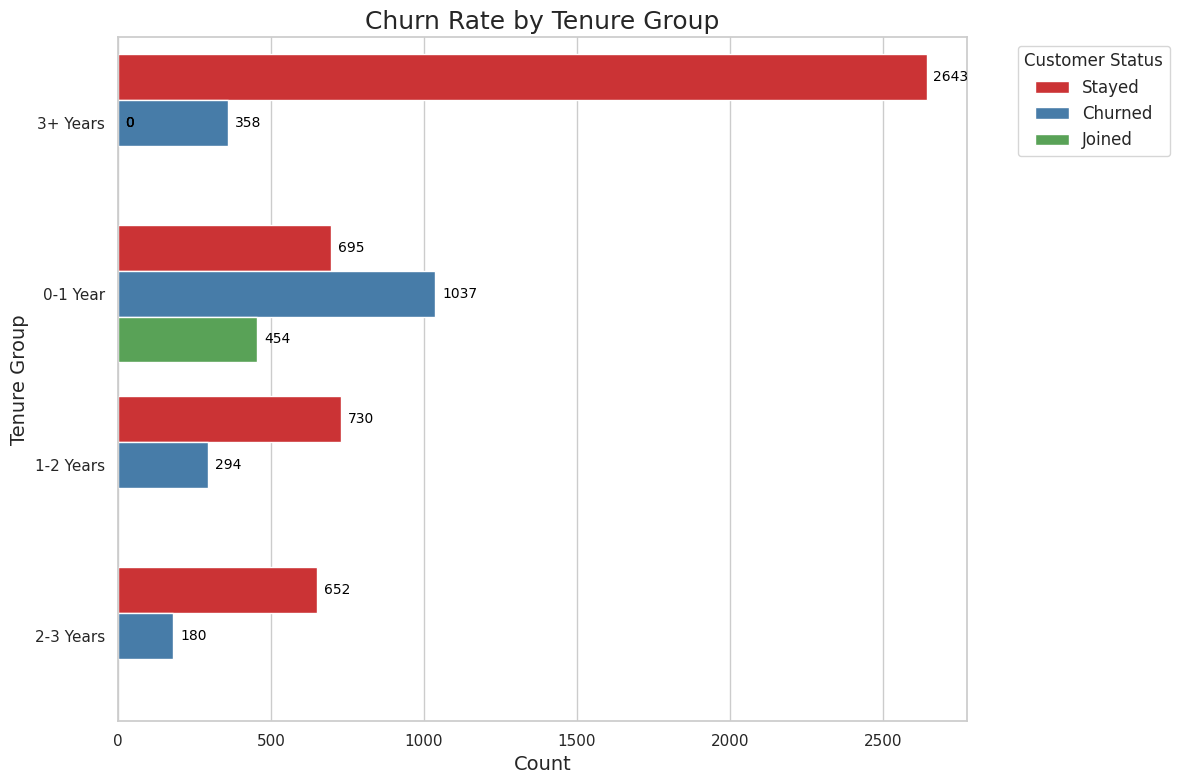

In [ ]:
# Create a sorted DataFrame for better visualization
sorted_counts = merged_df.groupby(['TenureGroup', 'Customer Status']).size().reset_index(name='Count')
sorted_counts = sorted_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))

# Horizontal bar plot for better readability
ax = sns.barplot(data=sorted_counts, y='TenureGroup', x='Count', hue='Customer Status', palette='Set1')

# Title and labels
plt.title("Churn Rate by Tenure Group", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Tenure Group", fontsize=14)

# Adding data labels
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}",
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left',
                va='center',
                fontsize=10,
                color='black',
                xytext=(5, 0),
                textcoords='offset points')

# Adjust legend position
plt.legend(title='Customer Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.tight_layout()  # Adjust layout for better fit
plt.show()


### **Subscription Services vs. Churn**

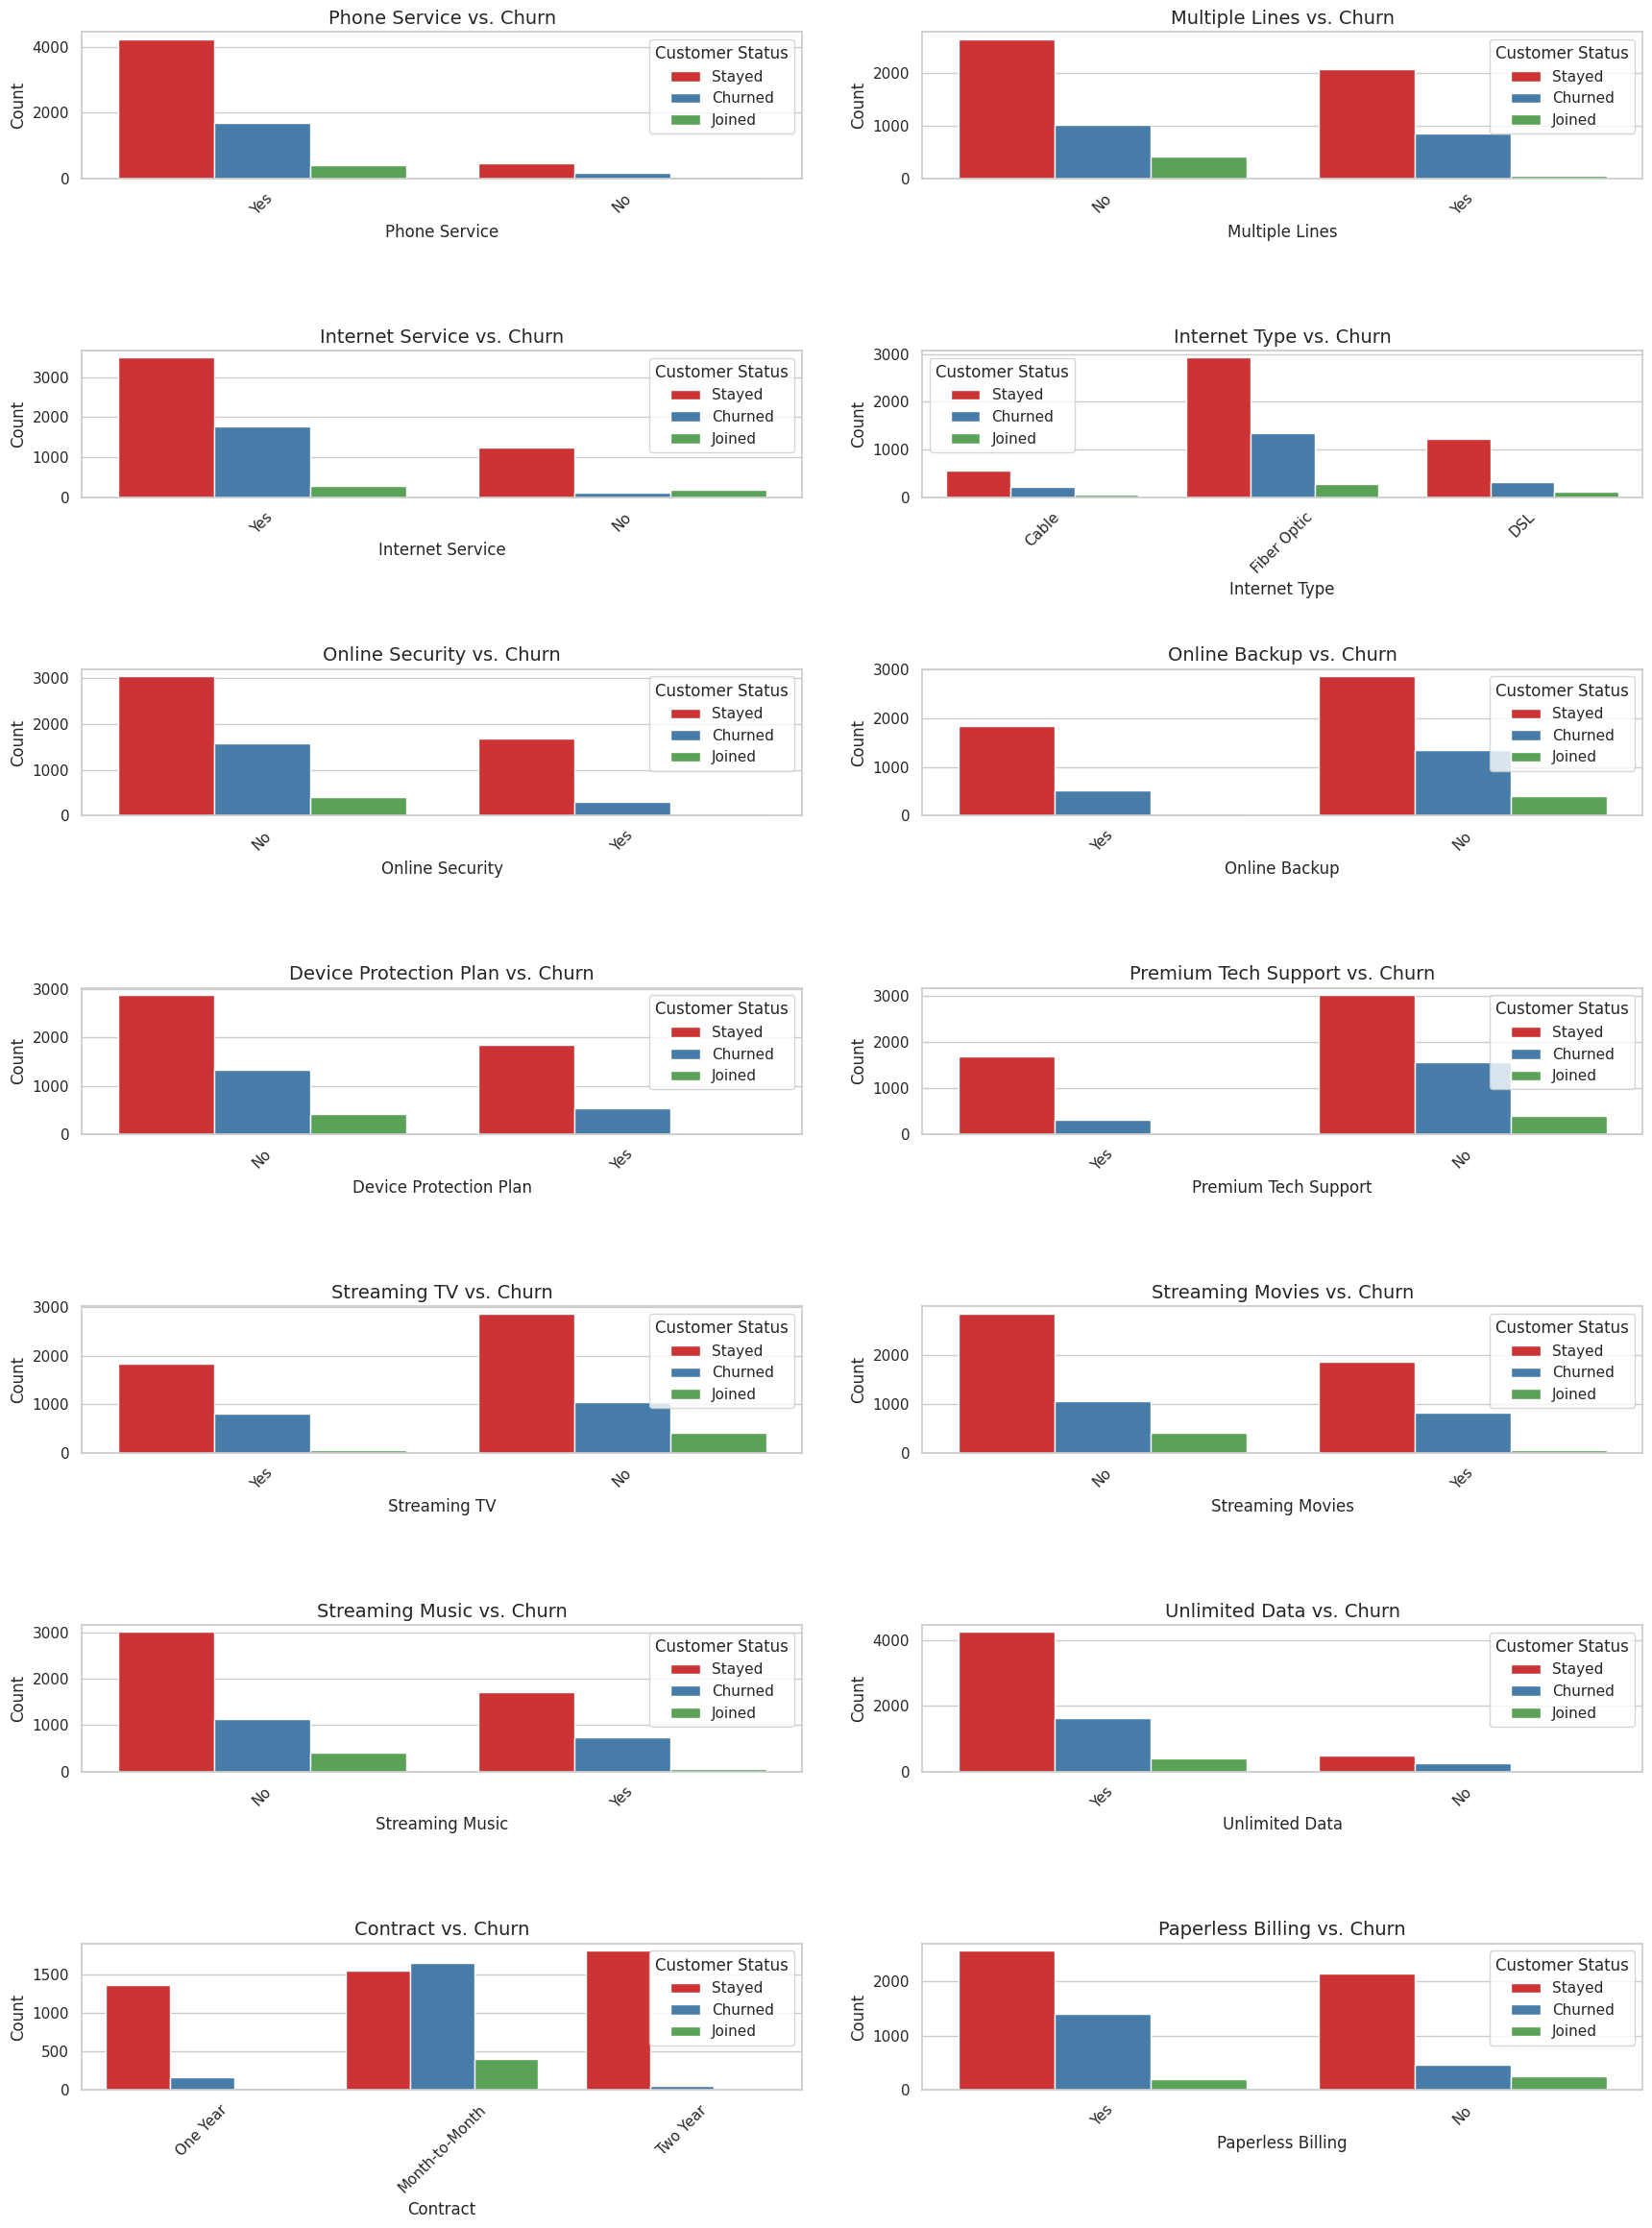

In [ ]:

# List of subscription service features to analyze
subscription_features = [
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Contract',
    'Paperless Billing'
]

# Churn Status
churn_column = 'Customer Status'  # Adjust this if your column name differs

# Increase figure size for better clarity
plt.figure(figsize=(18, 24))

# Plotting the relationship between subscription services and churn
for i, feature in enumerate(subscription_features):
    plt.subplot(7, 2, i + 1)  # Adjust the number of rows and columns
    sns.countplot(data=merged_df, x=feature, hue=churn_column, palette='Set1')
    plt.title(f"{feature} vs. Churn", fontsize=14)  # Set title font size
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.xlabel(feature)

plt.tight_layout(pad=3.0)  # Adjust the padding to give more space
plt.show()




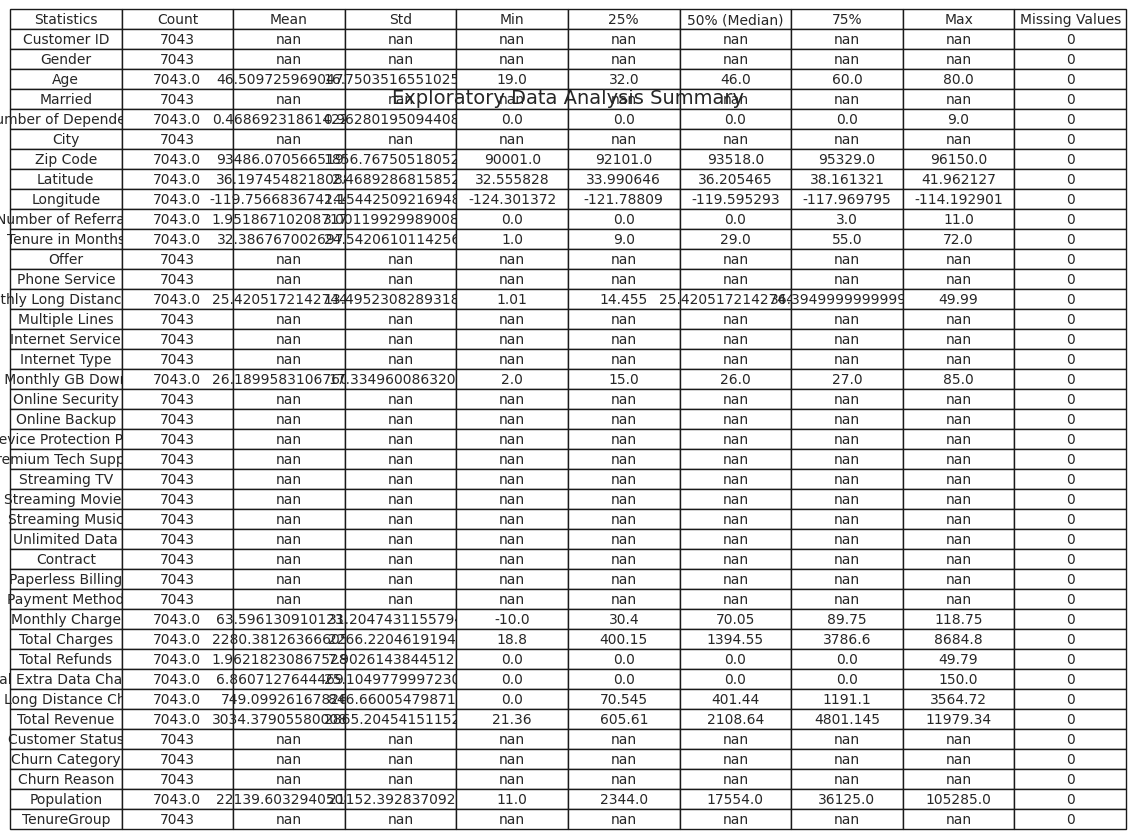

In [ ]:

summary = merged_df.describe(include='all')

# Identify key pain points (e.g., missing values)
missing_values = merged_df.isnull().sum()

# Create a summary DataFrame for visualization
summary_df = pd.DataFrame({
    'Statistics': summary.columns,
    'Count': summary.loc['count'],
    'Mean': summary.loc['mean'],
    'Std': summary.loc['std'],
    'Min': summary.loc['min'],
    '25%': summary.loc['25%'],
    '50% (Median)': summary.loc['50%'],
    '75%': summary.loc['75%'],
    'Max': summary.loc['max'],
    'Missing Values': missing_values
})

# Optional: You can sort or filter summary_df based on your criteria
# summary_df = summary_df.sort_values(by='Count', ascending=False)

# Display the summary table
fig, ax = plt.subplots(figsize=(12, 8))  # Set the size of the table
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale table size

plt.title('Exploratory Data Analysis Summary', fontsize=14)
plt.show()
